In [1]:
import rioxarray as rxa
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
r1_fp = '/Users/zachkeskinen/Documents/ice-road-copters/test/09_EXPORT/merged_out.tif'
r2_fp = '/Users/zachkeskinen/Documents/ice-road-copters/notebooks/quantum.tif'

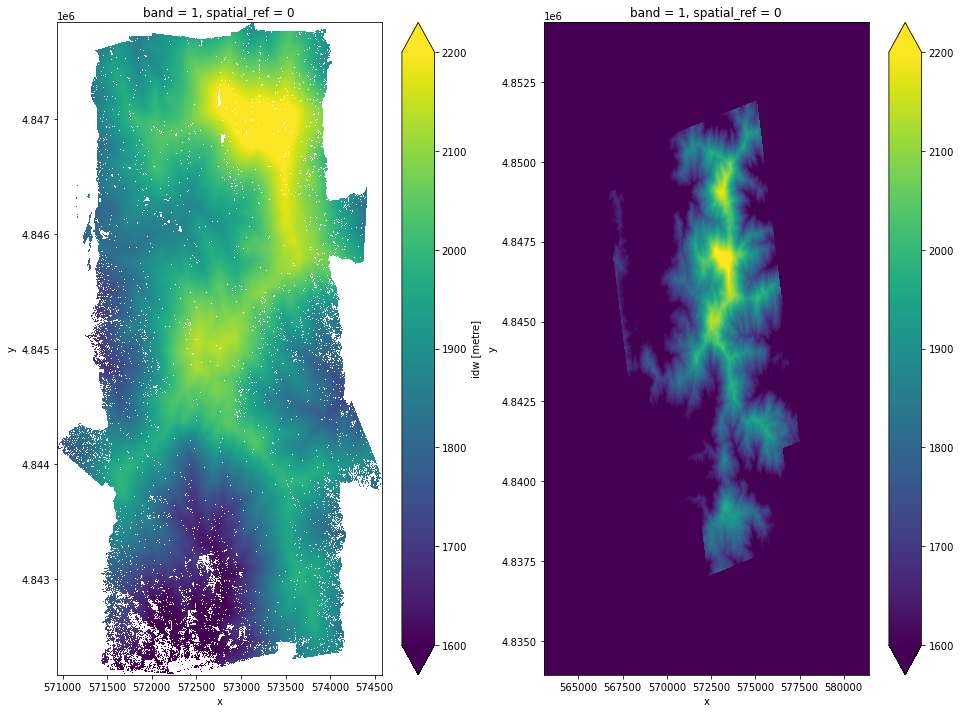

In [4]:
f, (ax, ax2) = plt.subplots(1, 2, figsize = (16,12))

r1 = rxa.open_rasterio(r1_fp, mask_and_scale=True)
r1.plot(ax = ax, vmin = 1600, vmax = 2200)
r2 = rxa.open_rasterio(r2_fp, mask_and_scale=True)
r2.plot(ax = ax2, vmin = 1600, vmax = 2200)

# cx.add_basemap(ax= ax, crs = r1.rio.crs)
# cx.add_basemap(ax = ax2, crs = r2.rio.crs)

In [5]:
from shapely.geometry import box
r2_repro = r2.rio.reproject_match(r1)

In [8]:
from os.path import join
r2_repro.rio.to_raster(join('/Users/zachkeskinen/Documents/ice-road-copters/test/dems','quantum_utm.tif'))

/Users/zachkeskinen/miniconda3/envs/heli/lib/python3.8/site-packages/rioxarray/raster_writer.py:110: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


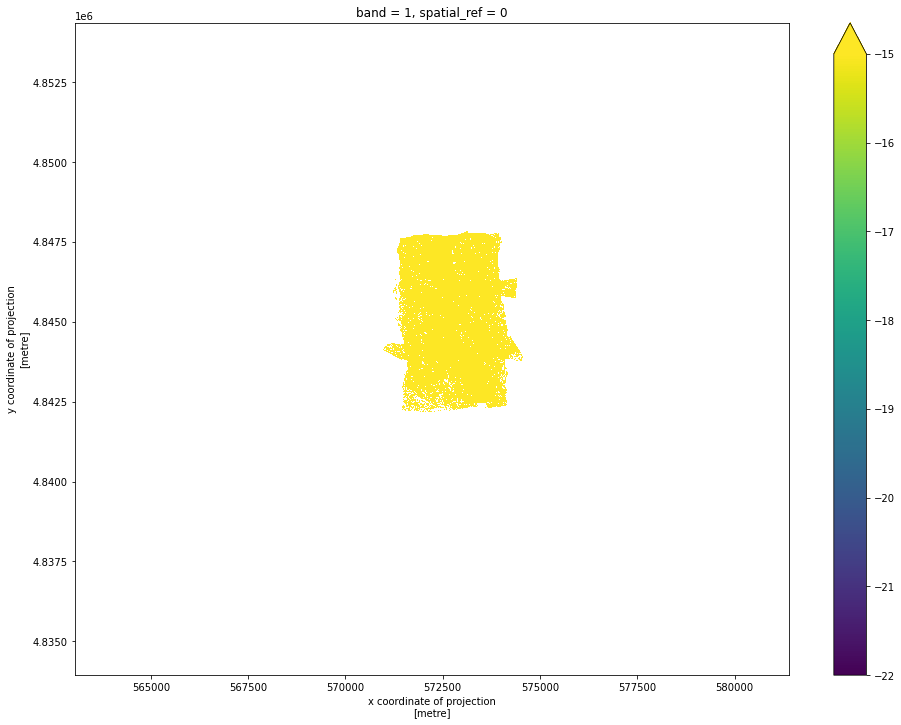

In [4]:
r2_repro = r1.rio.reproject_match(r2)
diff = r2-r2_repro
from shapely.geometry import box
bounds = box(*r1.rio.bounds())
clip = diff.rio.clip_box(*r1.rio.bounds())
f, (ax) = plt.subplots(1, 1, figsize = (16,12))
diff.plot(ax = ax, vmin = -22, vmax = -15)
# cx.add_basemap(ax = ax2, crs = diff.rio.crs)

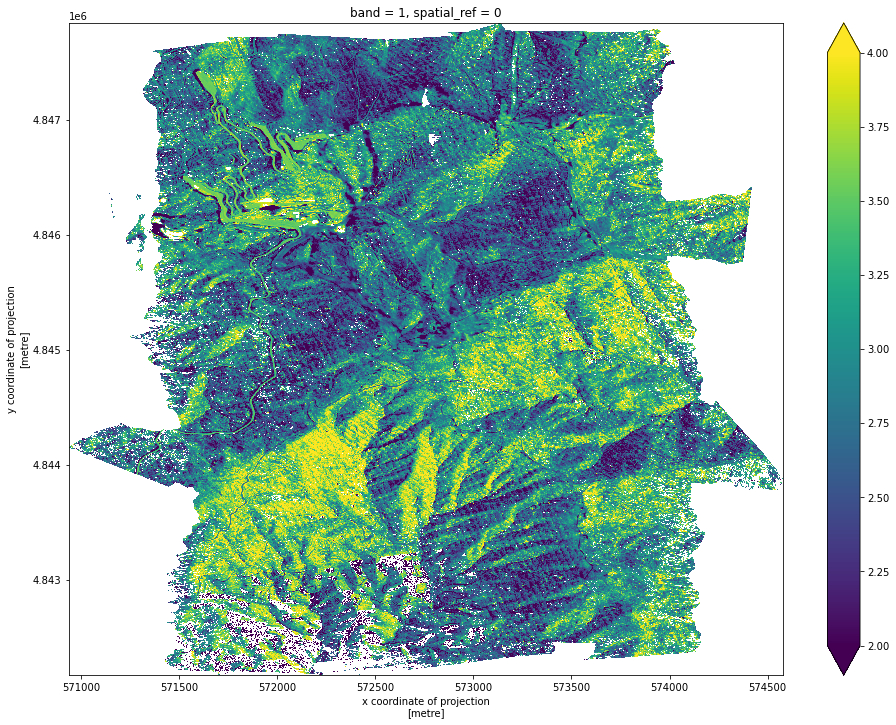

In [29]:
f, (ax) = plt.subplots(1, 1, figsize = (16,12))
clip.plot(ax = ax, vmin = 2, vmax = 4, add_colorbar = True)

In [9]:
r1.rio.crs

CRS.from_wkt('COMPD_CS["WGS 84 / UTM zone 11N",PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]],VERT_CS["Ellipsoidal Heights",VERT_DATUM["unknown",2005],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Up",UP]]]')

In [10]:
r2.rio.crs

CRS.from_epsg(32611)